In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pert
import pandas as pd

In [3]:
def histograma(variavel, titulo, rotulo_x, rotulo_y, inf, sup, n_columns, y_max):
    percentil_inf = np.quantile(variavel, inf)
    percentil_sup = np.quantile(variavel, sup)
    hist, bins = np.histogram(variavel, bins=n_columns)
    width = 0.94 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    fig = plt.figure(figsize=(8,6), dpi=300)
    plt.tick_params("both")
    plt.bar(center, hist/hist.sum(), align='center', width=width)
    plt.vlines(percentil_inf, ymin=0, ymax=y_max['max1'], color="green", linestyle='--', linewidth=1)
    plt.vlines(np.mean(variavel), ymin=0, ymax=y_max['max2'], color="black", linestyle='--', linewidth=1)
    plt.vlines(percentil_sup, ymin=0, ymax=y_max['max3'], color="green", linestyle='--', linewidth=1)
    plt.text(percentil_inf, y_max['max1'], f"{inf*100:2.1f}%: {percentil_inf:3.5f}", bbox=dict(facecolor='white', alpha=1))
    plt.text(np.mean(variavel), y_max['max2'], f"Média: {np.mean(variavel):3.5f}", bbox=dict(facecolor='white', alpha=1))
    plt.text(percentil_sup, y_max['max3'], f"{sup*100:2.1f}%: {percentil_sup:3.5f}", bbox=dict(facecolor='white', alpha=1))
    plt.title(titulo)
    plt.xlabel(rotulo_x)
    plt.ylabel(rotulo_y)
    #plt.legend()
    plt.tick_params(bottom=True, top=True, left=True, right=True)
    plt.tick_params(direction="in")
#     plt.savefig('Fig.2 CseU_Passiva_risco.tiff', dpi=100)
    plt.savefig('Fig.3 Cse_Passiva_risco.tiff', dpi=100)
    plt.show()
    return fig

# Nós

In [4]:
# Número de ensaios
n_ensaios = 1000

# Nós de risco - rebanho
regioes = {'Serra':{'RR':1,
                    'Prop_Populacao':0.782,
                    'PrSSC':0.33,
                    'PrSSC_r':0.40},
           'Litoral':{'RR':1.89,
                      'Prop_Populacao':0.170,
                      'PrSSC':0.33,
                     'PrSSC_r':0.47},
           'Amazonia':{'RR':0.89,
                       'Prop_Populacao':0.048,
                       'PrSSC':0.33,
                      'PrSSC_r':0.13}
          }

# Nós de infecção - rebanho
# prev_reb = 0.038
prev_reb = pert.PERT(0.011,0.038,0.087).rvs(n_ensaios) # pre estudos transversais

# Nós de infecção - animais
prev_ani = pert.PERT(0.272,0.374,0.592).rvs(n_ensaios) #Vig_pasiva_amostragem de casos

# Nós de detecção
prob_notificacao_reb = pert.PERT(0.042,0.062,0.086).rvs(n_ensaios) #
prob_coleta_amostra = pert.PERT(0.438,0.703,0.954).rvs(n_ensaios) #Quantos casos o vet amostrou Vig.geral vs Vig.esp
num_ani_examinados = pert.PERT(5,11,14).rvs(n_ensaios) # Total animais amostrados vig.casos.PSC

sens_elisa = pert.PERT(0.90,0.95,0.97).rvs(n_ensaios) #

# Número de propriedades examinadas
# Prop_vigil = 290  #2017
Prop_vigil = 306  #2018
# Prop_vigil = 290  #2019

# Proporção no componente de vigilância
PrSSC = np.repeat(np.array([[1/3]]),3, axis=0)

In [5]:
PrSSC

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

## Cálculo efetiva probabilidade de infecção

In [6]:
def epi(categorias):
    categorias_valores = list(categorias.keys())
    somatoria = 0
    for categoria in categorias_valores:
        somatoria += categorias[categoria]['Prop_Populacao']*categorias[categoria]['RR']/categorias[categorias_valores[0]]['RR']
    for categoria in categorias_valores:
        categorias[categoria]['Raj'] = (1/somatoria)*categorias[categoria]['RR']/categorias[categorias_valores[0]]['RR']
        categorias[categoria]['EPI']  = categorias[categoria]['Raj']*prev_reb
        

In [9]:
epi(regioes)

In [10]:
regioes

{'Serra': {'RR': 1,
  'Prop_Populacao': 0.782,
  'PrSSC': 0.33,
  'PrSSC_r': 0.4,
  'Raj': 0.8725851206785221,
  'EPI': array([0.06320286, 0.01817474, 0.02058988, 0.02088779, 0.03205733,
         0.03111407, 0.0156157 , 0.05049902, 0.04285031, 0.03849158,
         0.03615438, 0.0404597 , 0.06237987, 0.06719549, 0.01819364,
         0.04075647, 0.04975373, 0.03653543, 0.05487074, 0.022596  ,
         0.04475759, 0.06578815, 0.02874785, 0.0172984 , 0.02386409,
         0.05077029, 0.04621311, 0.03826618, 0.0170666 , 0.03343479,
         0.04029348, 0.02707144, 0.03631593, 0.01748334, 0.01408607,
         0.02184133, 0.02207519, 0.01754535, 0.04673783, 0.04762395,
         0.04507233, 0.06076797, 0.02695138, 0.03841754, 0.03596103,
         0.04123817, 0.01863227, 0.04013958, 0.02184954, 0.04740517,
         0.05041413, 0.02416376, 0.04653013, 0.03842556, 0.03835045,
         0.03435631, 0.02822342, 0.01808358, 0.04306562, 0.03963954,
         0.05714992, 0.01778298, 0.06186066, 0.0299188

# EPI por ramo

In [8]:
print(regioes['Serra']['EPI'].mean())
print(regioes['Litoral']['EPI'].mean())
print(regioes['Amazonia']['EPI'].mean())

0.036460561267337335
0.06891046079526755
0.032449899527930225


# Sensibilidade unitária do componente (CSeU)

Sensibilidade unitaria por ramo
0.0005269076752885351
0.000995855506295331
0.00046894783100679614


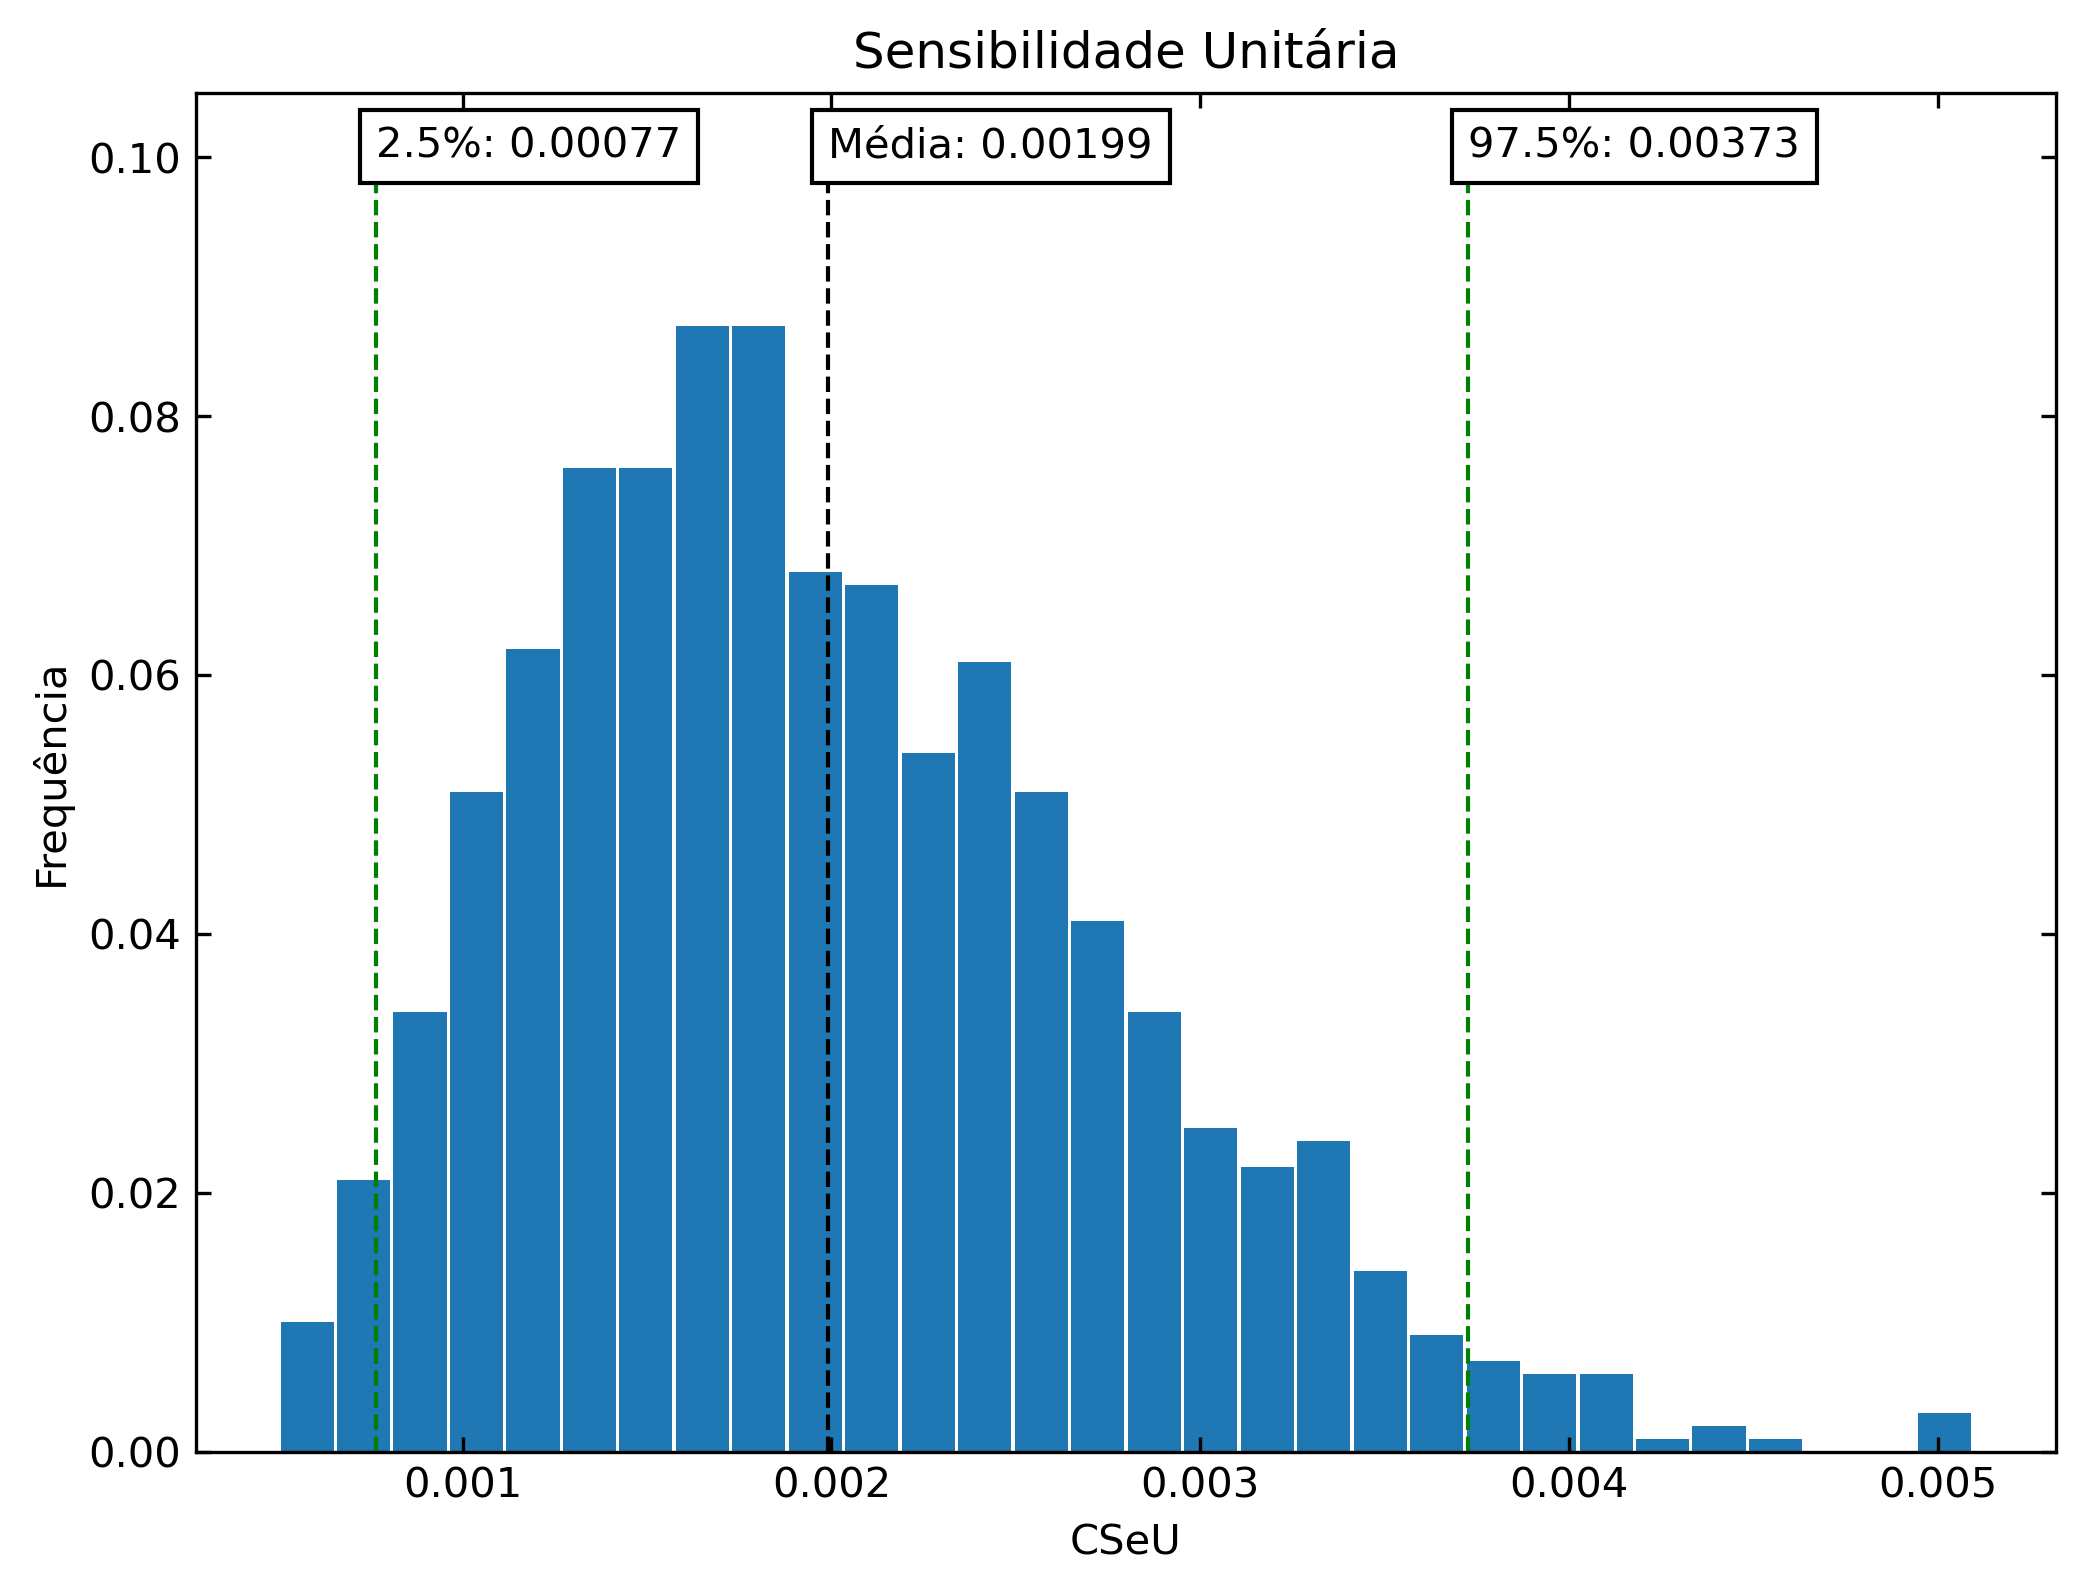

In [9]:
CSeU = 0
reg = []
for regiao in regioes:
    CSeU += regioes[regiao]['PrSSC']*regioes[regiao]['EPI']*prob_notificacao_reb*prob_coleta_amostra*(1-(1-sens_elisa)**(num_ani_examinados*prev_ani))
    reg.append(regioes[regiao]['PrSSC']*regioes[regiao]['EPI']*prob_notificacao_reb*prob_coleta_amostra*(1-(1-sens_elisa)**(num_ani_examinados*prev_ani)))

print('Sensibilidade unitaria por ramo')
print(reg[0].mean())
print(reg[1].mean())
print(reg[2].mean())

Fig = histograma(CSeU, "Sensibilidade Unitária", "CSeU", "Frequência", inf=0.025, sup=0.975, n_columns=30, y_max={'max1':0.1, 'max2':0.1, 'max3':0.1}) 


# Sensibilidade do componente (CSe)

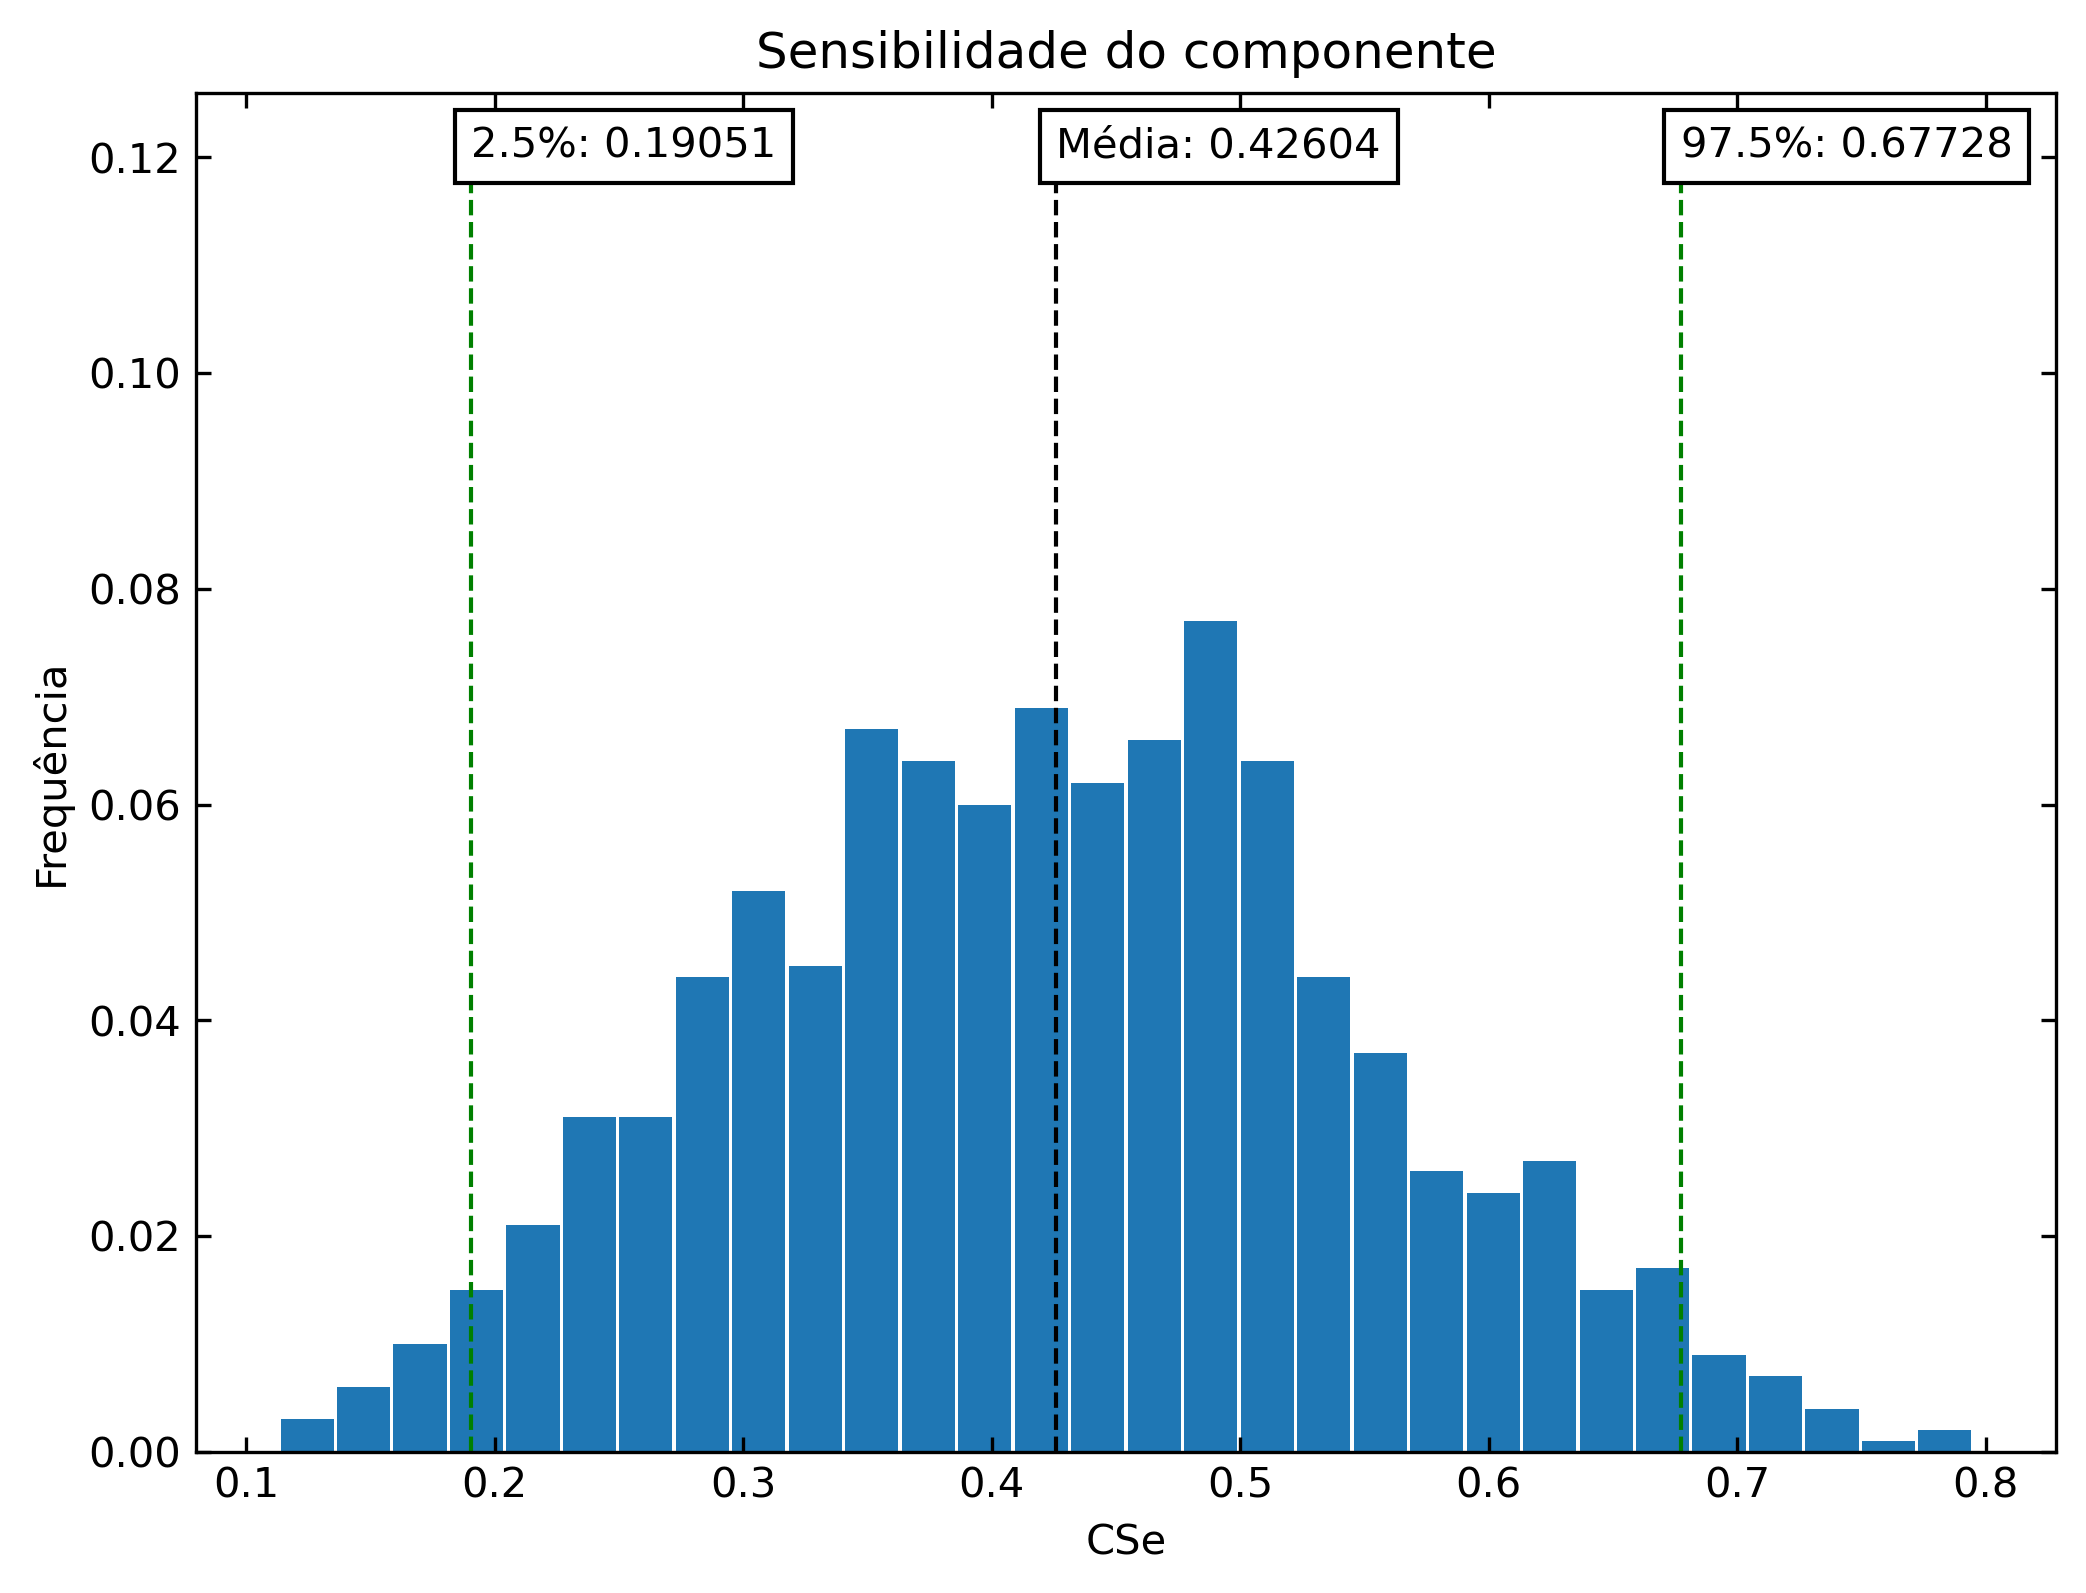

In [74]:
CSe = 1 - (1-CSeU)**Prop_vigil
# CSe = 1 - (1-CSeU)**(290*1)

# print(CSe)
fig = histograma(CSe, "Sensibilidade do componente", "CSe", "Frequência", inf=0.025, sup=0.975, n_columns=30, y_max={'max1':0.12, 'max2':0.12, 'max3':0.12}) 
#fig.show()
# print(CSe)

# Vigilancia baseada em risco

In [60]:
def histograma(variavel, titulo, rotulo_x, rotulo_y, inf, sup, n_columns, y_max):
    percentil_inf = np.quantile(variavel, inf)
    percentil_sup = np.quantile(variavel, sup)
    hist, bins = np.histogram(variavel, bins=n_columns)
    width = 0.94 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    fig = plt.figure(figsize=(8,6), dpi=300)
    plt.tick_params("both")
    plt.bar(center, hist/hist.sum(), align='center', width=width, color='green')
    plt.vlines(percentil_inf, ymin=0, ymax=y_max['max1'], color="red", linestyle='--', linewidth=1)
    plt.vlines(np.mean(variavel), ymin=0, ymax=y_max['max2'], color="black", linestyle='--', linewidth=1)
    plt.vlines(percentil_sup, ymin=0, ymax=y_max['max3'], color="red", linestyle='--', linewidth=1)
    plt.text(percentil_inf, y_max['max1'], f"{inf*100:2.1f}%: {percentil_inf:3.6f}", bbox=dict(facecolor='white', alpha=1))
    plt.text(np.mean(variavel), y_max['max2'], f"Média: {np.mean(variavel):3.6f}", bbox=dict(facecolor='white', alpha=1))
    plt.text(percentil_sup, y_max['max3'], f"{sup*100:2.1f}%: {percentil_sup:3.6f}", bbox=dict(facecolor='white', alpha=1))
    plt.title(titulo)
    plt.xlabel(rotulo_x)
    plt.ylabel(rotulo_y)
    #plt.legend()
    plt.tick_params(bottom=True, top=True, left=True, right=True)
    plt.tick_params(direction="in")
#     plt.savefig('Fig.4 CseU_Passiva_risco.tiff', dpi=100)
    plt.savefig('Fig.5 Cse_Passiva_risco.tiff', dpi=100)
    plt.show()
    return fig

Sensibilidade unitaria por ramo
0.0006478119762675044
0.0014386284462960602
0.00018737961413537566


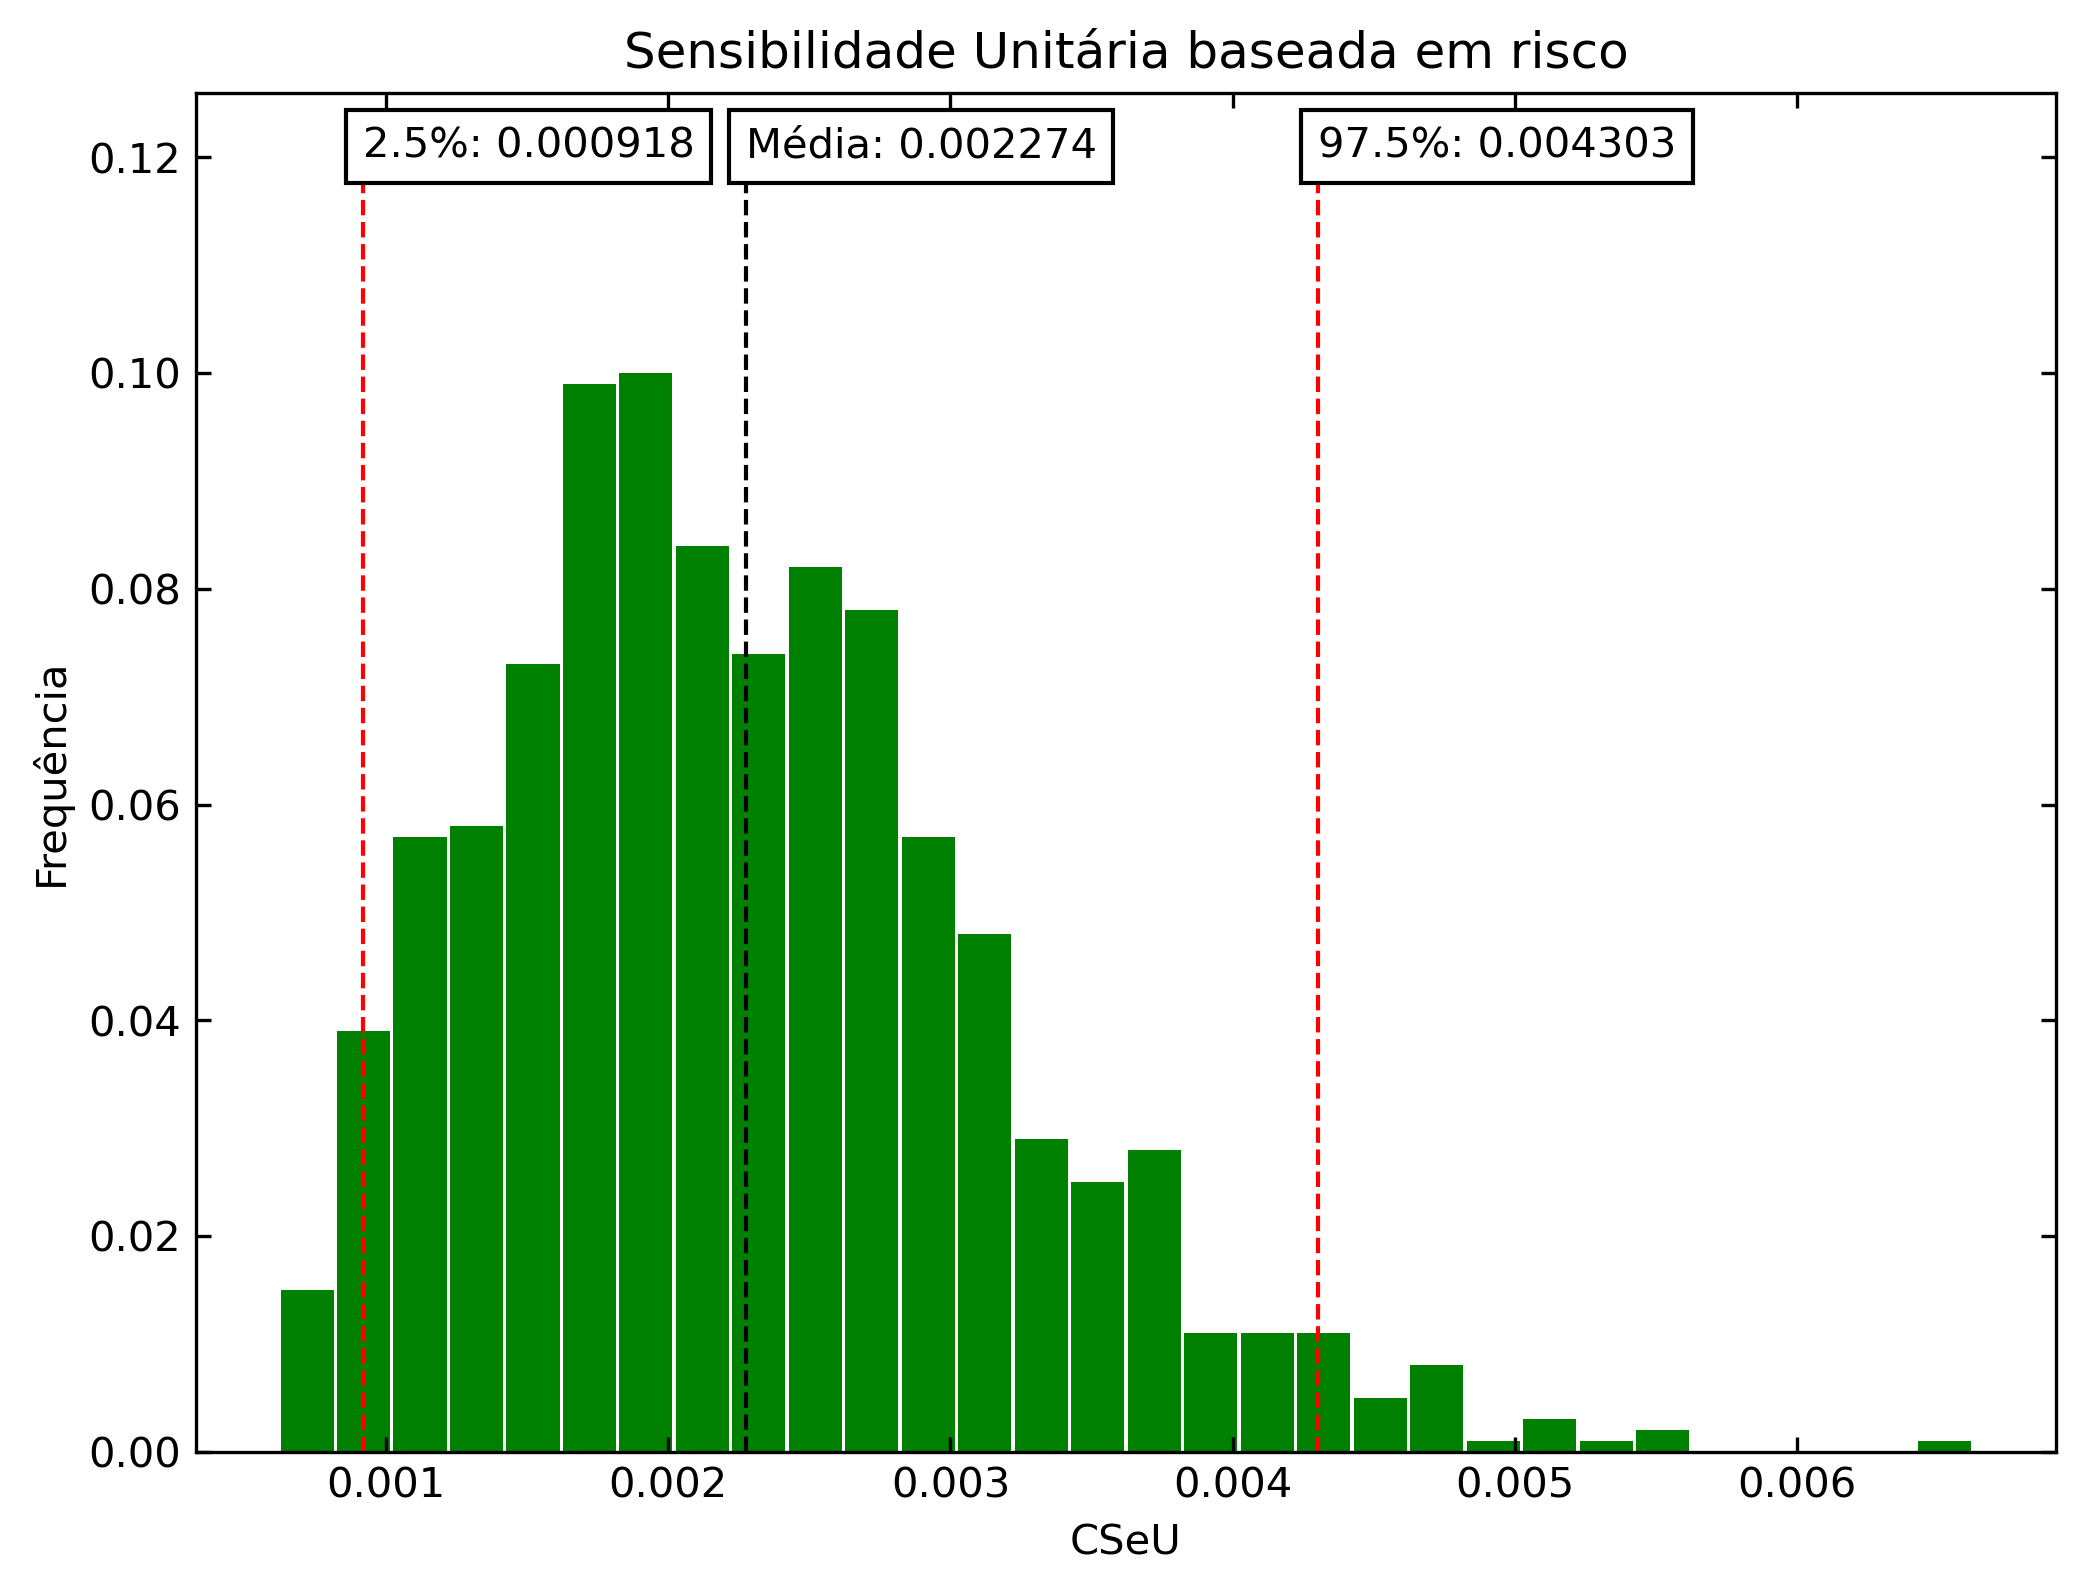

In [59]:
CSeU = 0
reg = []
for regiao in regioes:
    CSeU += regioes[regiao]['PrSSC_r']*regioes[regiao]['EPI']*prob_notificacao_reb*prob_coleta_amostra*(1-(1-sens_elisa)**(num_ani_examinados*prev_ani))
    reg.append(regioes[regiao]['PrSSC_r']*regioes[regiao]['EPI']*prob_notificacao_reb*prob_coleta_amostra*(1-(1-sens_elisa)**(num_ani_examinados*prev_ani)))

print('Sensibilidade unitaria por ramo')
print(reg[0].mean())
print(reg[1].mean())
print(reg[2].mean())

Fig = histograma(CSeU, "Sensibilidade Unitária baseada em risco", "CSeU", "Frequência", inf=0.025, sup=0.975, n_columns=30, y_max={'max1':0.12, 'max2':0.12, 'max3':0.12}) 


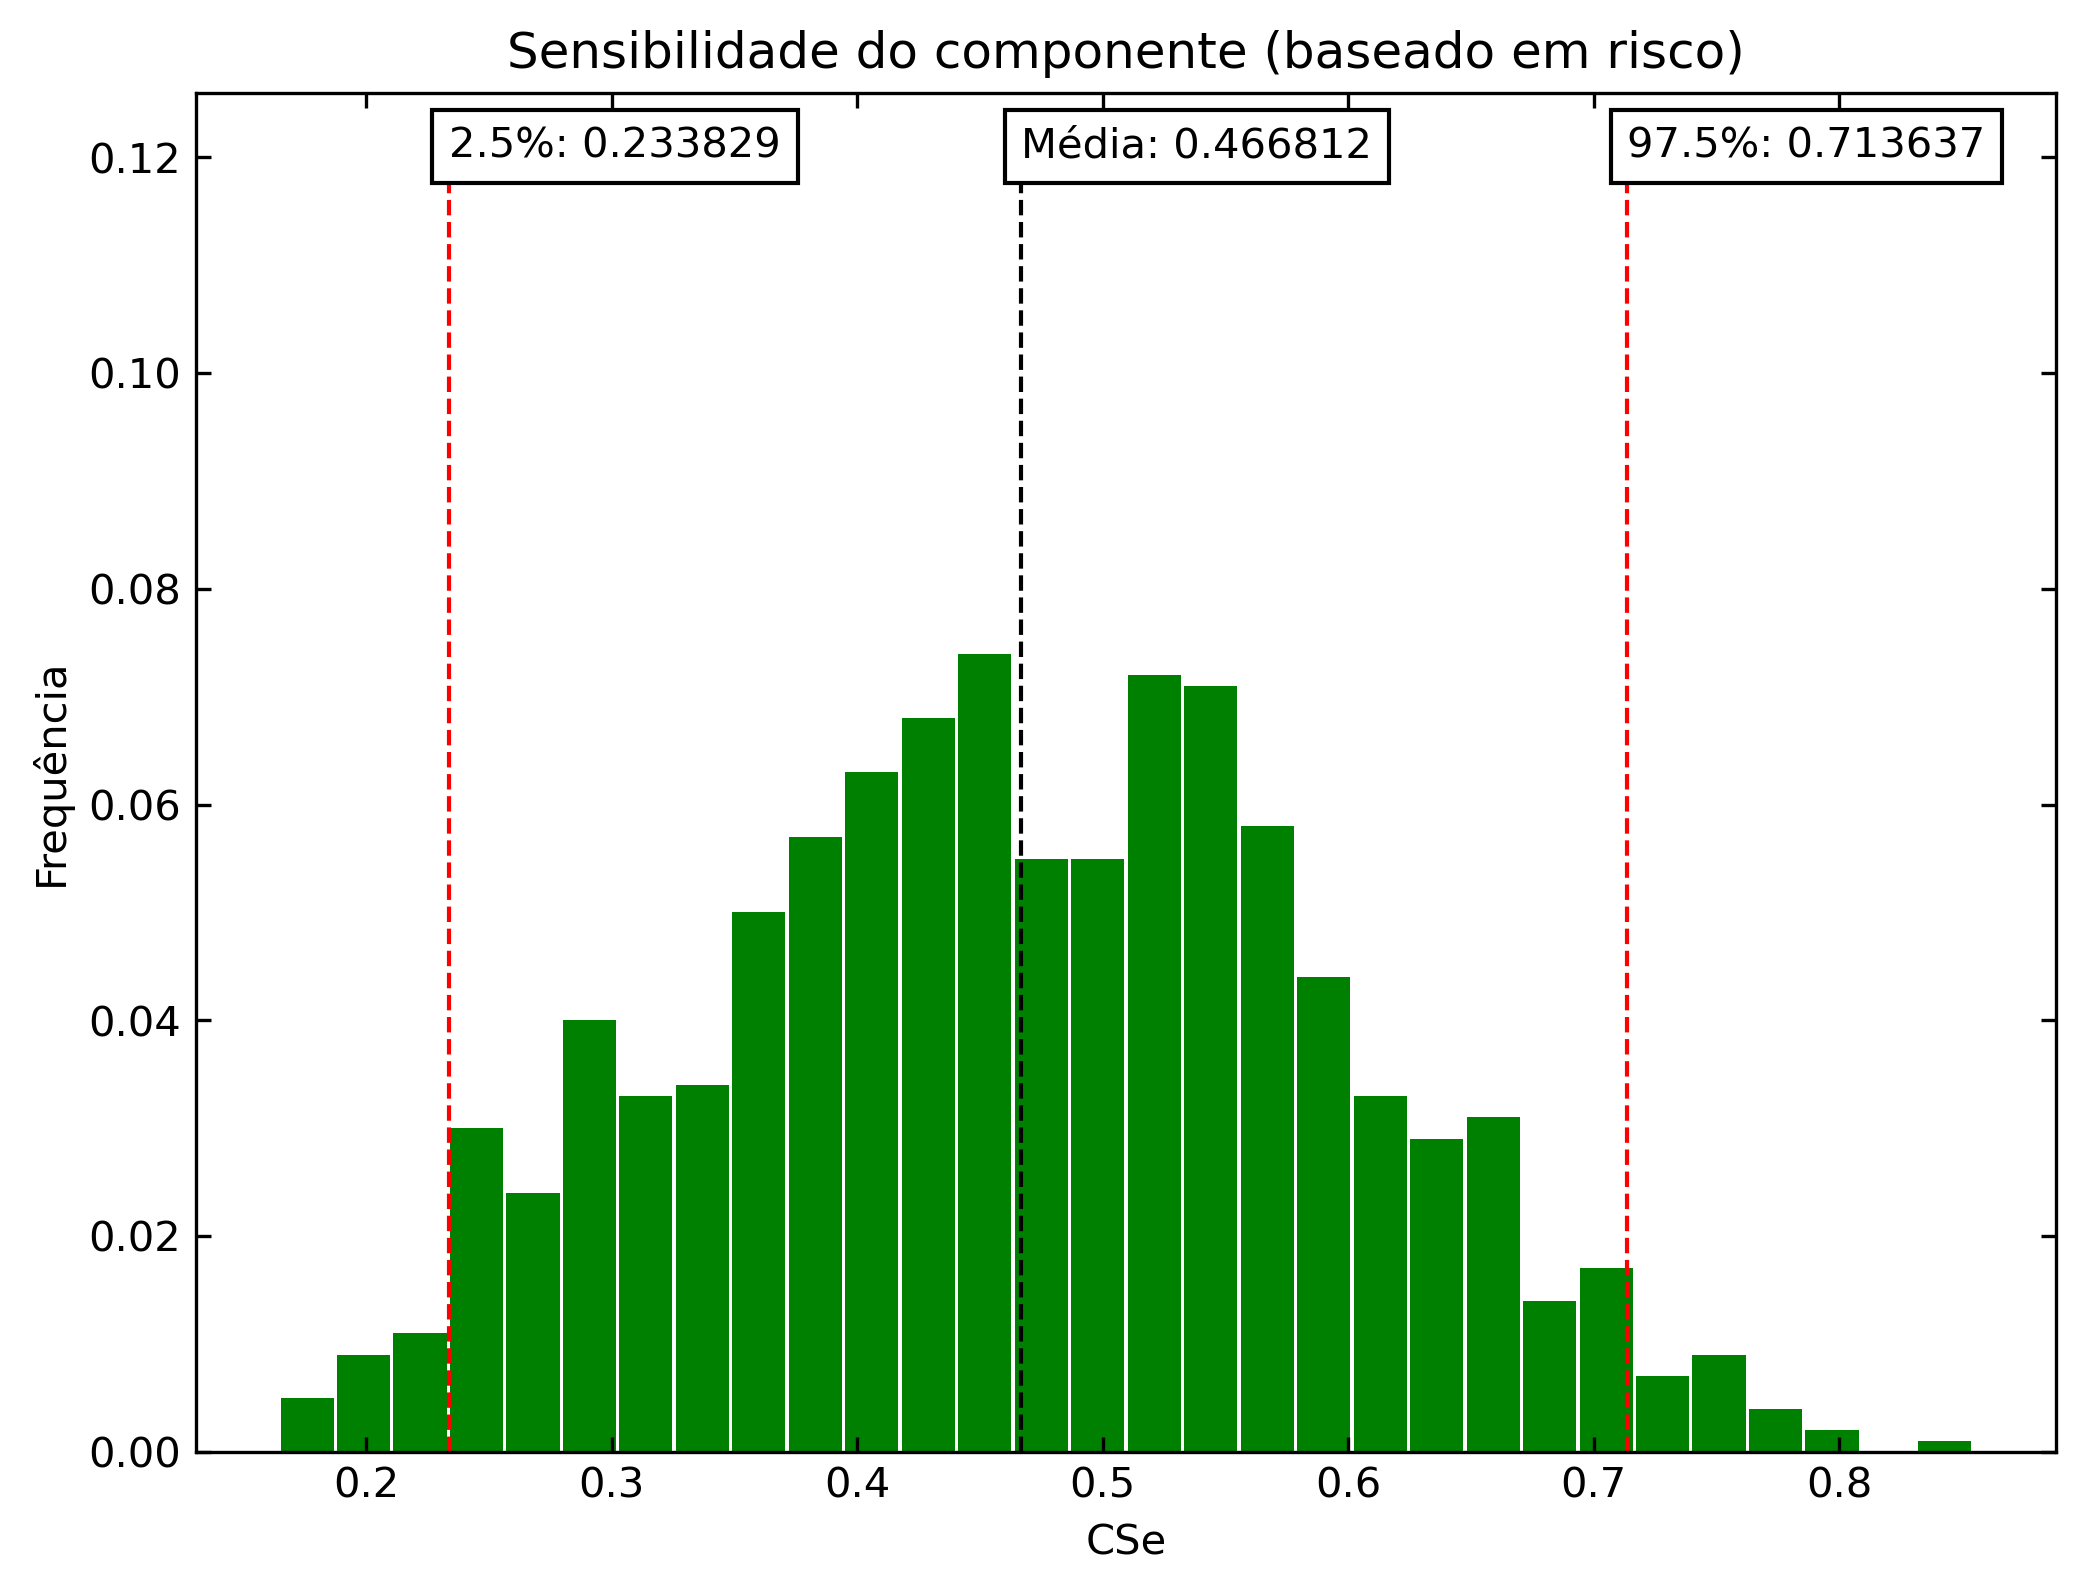

In [61]:
CSe_r = 1 - (1-CSeU)**Prop_vigil
# CSe = 1 - (1-CSeU)**1000

fig = histograma(CSe_r, "Sensibilidade do componente (baseado em risco)", "CSe", "Frequência", inf=0.025, sup=0.975, n_columns=30, y_max={'max1':0.12, 'max2':0.12, 'max3':0.12}) 
# fig.show()